### Elevation Profile Plot from a GPS Track

We will take a GPS track for a mountain trek recorded from Strava app and create an elevation profile plot. We also explore some advanced charting functions to add labels on X-axis at precise time intervals.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd
import requests

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [ ]:
filename = 'summit.gpx'

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/gps/'

download(data_url + filename)

#### Data Pre-Processing

In [ ]:
gpx_path = os.path.join(data_folder, filename)
# GPX files contain many layers. Read the 'track_points' layer
gdf = gpd.read_file(gpx_path, layer='track_points')
gdf = gdf[['track_fid','ele', 'time', 'geometry']]
gdf

Let's use the timestamp contained in the 'time' column as the index. This will allow us to filter and plot the time-series data easily. We must first convert the time column to datetime type with an appropriate timezone.

In [ ]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf = gdf.set_index('time')
gdf.index = gdf.index.tz_convert('Asia/Kolkata')
gdf

Using time as index allows us to filter the data as follows

In [ ]:
gdf_subset = gdf['2022-04-04T06:15:00':'2022-04-04T10:45:00']
gdf_subset

We can now plot the elevation against the timestamp using Matplotlib. Since we have a large number of timestamps, we can use `set_major_locator()` to define what labels will be present on the axis.

Since our timestamps are timezone aware, we can also plot a timezone name (i.e. IST) along with the label.

We can also use a different style for our plot. You can run `plt.style.available` to see all available styles.

In [ ]:
plt.style.use('ggplot')

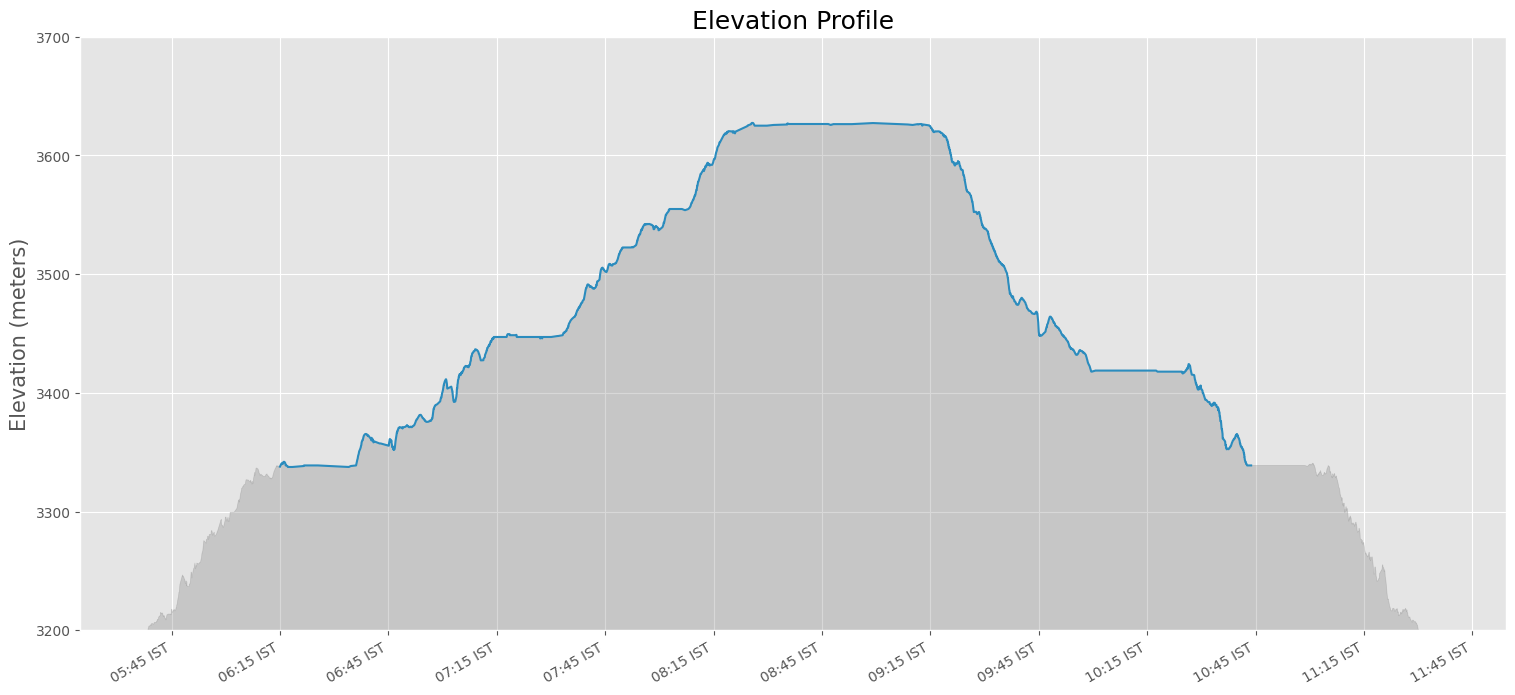

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

# We show a subset of track for the summit in a blue line
gdf_subset['ele'].plot(kind='line', ax=ax, color='#2b8cbe')
# The full track is shown with a grey fill
ax.fill_between(gdf.index, gdf['ele'].values, color='grey', alpha=0.3)
plt.tight_layout()
plt.title('Elevation Profile', fontsize = 18)
plt.ylabel('Elevation (meters)', size = 15)
plt.xlabel(None)

# Show a tick every 30 minute
xlocator = mdates.MinuteLocator(interval=30)
xformat = mdates.DateFormatter('%H:%M %Z', tz=gdf.index.tz)

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformat)

ax.set_ylim([3200, 3700])
plt.show()